Import libraries and load the train and test data from the respective files.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# reading train data
train_df = pd.read_csv('train.csv')

# reading test data
test_df = pd.read_csv('test.csv')

Show off the top 5 columns.

In [85]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Show off the shape of the data

In [86]:
train_df.shape

(891, 12)

Show the columns we are working with.

In [87]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Check how many null values are in each column.

In [88]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Describe the training data frame.

In [89]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Make a graph and show the sizes of each Pclass.

In [90]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

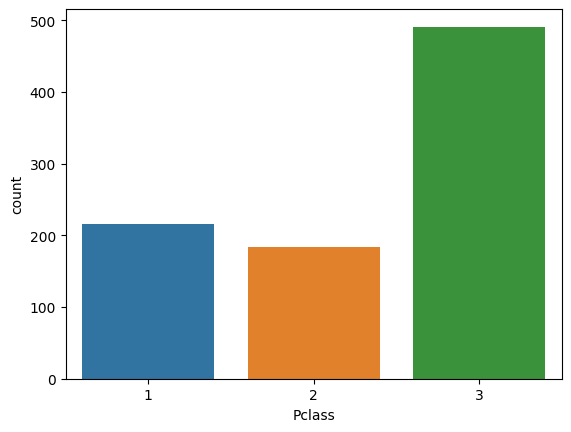

In [91]:
sns.countplot(x = 'Pclass', data = train_df)

Make a graph and show the different amount of males and females.

In [92]:
#Shows the different amount of each 'Sex' in this case so only two cases.
train_df['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

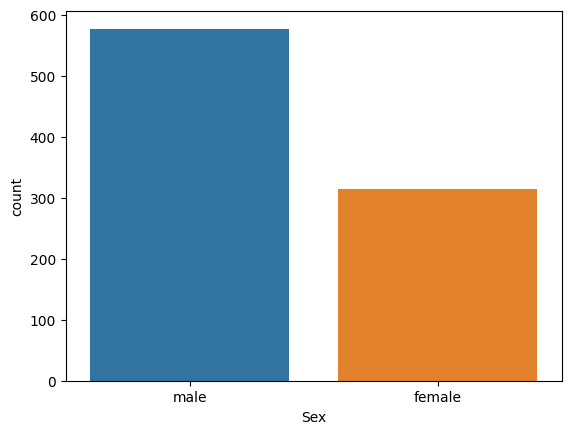

In [93]:
#graph the function set x axis to Sex and using the data frame train_df
sns.countplot(x = 'Sex', data = train_df)

Show the different amount for each 'Embarked' value.

In [94]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

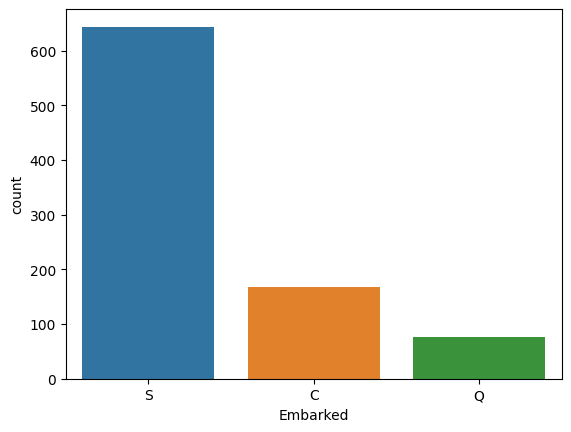

In [95]:
sns.countplot(x = 'Embarked', data = train_df)

Shows the SibSp values in a table and graph

In [96]:
train_df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

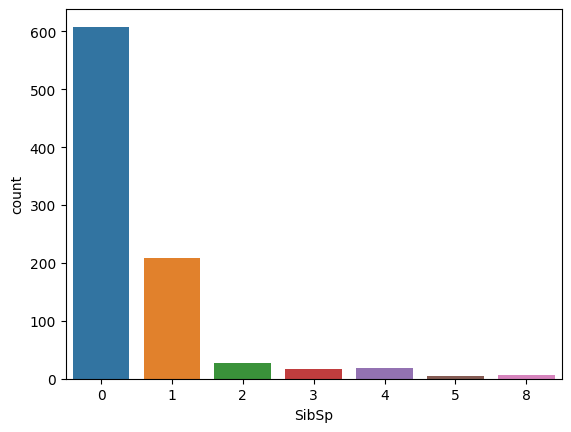

In [97]:
sns.countplot(x='SibSp', data=train_df)

Table to show how Pclass and Survived relate.

In [98]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Table to show how Sex and Survived relate.

In [99]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Table to show how Sex and Pclass relate.

In [100]:
#doesn't work the best but shows that the average each sex averaged to 2nd class with female closer to 1st.
train_df[["Sex", "Pclass"]].groupby(['Sex'], as_index=False).mean()

,Sex,Pclass
0,female,2.159236
1,male,2.389948


Table to show how SibSp and Survived relate.

In [101]:

train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Table to show how Parch and Survived relate.

In [102]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


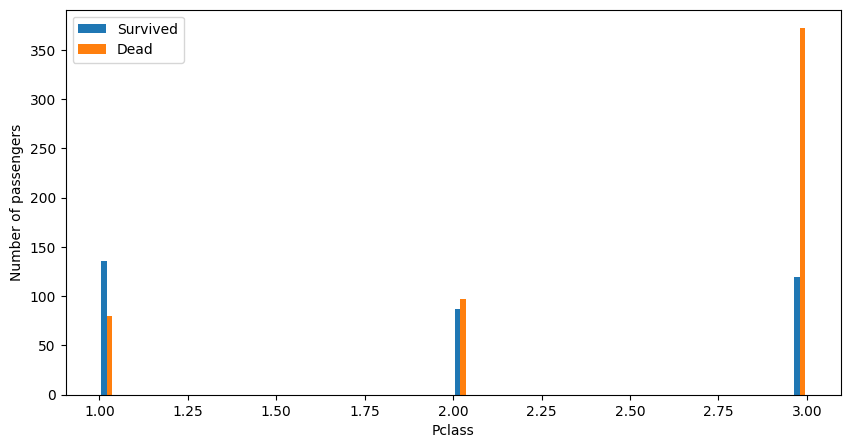

In [103]:
#This is a cool way to see how Pclass realted to the survival rate of people on the ship.
figure = plt.figure(figsize=(10, 5))
plt.hist([train_df[train_df['Survived'] == 1]['Pclass'], train_df[train_df['Survived'] == 0]['Pclass']], bins = 50, label = ['Survived','Dead'])
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')
plt.legend()